In [1]:
%matplotlib inline
import matplotlib
from matplotlib.font_manager import FontProperties
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb}'
from matplotlib import rc
rc('text', usetex=True)

from tqdm import tqdm

from PETITE.AllProcesses import *

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator

font0 = FontProperties()
font = font0.copy()
font.set_size(24)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(20)
labelfont.set_weight('bold')
legfontBig=font0.copy()
legfontBig.set_size(18)
legfontBig.set_weight('bold')

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [2]:
Eg0 = 0.5
me0 = 0.000511
al0 = 1/137.0
mV0 = 0.0
EvtInfo={'E_inc': Eg0, 'm_e': me0, 'Z_T': 1.0, 'alpha_FS': al0, 'm_V': mV0}

In [7]:
igrange = [[-1., 1.]]
integrand = vg.Integrator(igrange)
print(integrand.settings())

Integrator Settings:
    1000 (approx) integrand evaluations in each of 10 iterations
    number of:  strata/axis = [125]
                increments/axis = [125]
                h-cubes = 125  evaluations/h-cube = 2 (min)
                h-cubes/batch = 1000
    minimize_mem = False
    adapt_to_errors = False
    damping parameters: alpha = 0.5  beta= 0.75
    limits: h-cubes < 1e+09  evaluations/h-cube < 1e+06
    accuracy: relative = 0  absolute accuracy = 0

    axis 0 covers (-1.0, 1.0)



In [8]:
integrand(functools.partial(dSCompton_dCT, EvtInfo), nitn=100, nstrat=[30])
result = integrand(functools.partial(dSCompton_dCT, EvtInfo), nitn=100, nstrat=[30])

In [9]:
print(result.summary())

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   5.309(25)       5.309(25)           0.00     1.00
  2   5.277(23)       5.292(17)           0.86     0.35
  3   5.321(23)       5.302(14)           0.96     0.38
  4   5.306(26)       5.303(12)           0.65     0.58
  5   5.299(23)       5.302(11)           0.49     0.74
  6   5.281(23)       5.2984(97)          0.54     0.75
  7   5.292(23)       5.2974(89)          0.46     0.84
  8   5.274(24)       5.2946(83)          0.51     0.83
  9   5.282(23)       5.2932(78)          0.48     0.87
 10   5.309(22)       5.2949(74)          0.48     0.89
 11   5.267(26)       5.2928(71)          0.54     0.87
 12   5.272(24)       5.2912(68)          0.55     0.87
 13   5.284(23)       5.2906(65)          0.51     0.91
 14   5.298(23)       5.2912(63)          0.48     0.94
 15   5.255(23)       5.2886(60)          0.61     0.86
 16   5.286(24)       5.2885(59)          0.57  

In [10]:
pickler = Compton_S([Eg0, me0, mV0, al0], VB=True, mode='Pickle')

In [11]:
print(pickler.settings())

Integrator Settings:
    2400 (approx) integrand evaluations in each of 5000 iterations
    number of:  strata/axis = [300]
                increments/axis = [300]
                h-cubes = 300  evaluations/h-cube = 2 (min)
                h-cubes/batch = 1000
    minimize_mem = False
    adapt_to_errors = False
    damping parameters: alpha = 0.5  beta= 0.75
    limits: h-cubes < 1e+09  evaluations/h-cube < 1e+06
    accuracy: relative = 0  absolute accuracy = 0

    axis 0 covers (-1.0, 1.0)



In [12]:
AllEvts = []
for x, wgt in tqdm(pickler.random()):
    AllEvts.append([x[0], dSCompton_dCT(EvtInfo, x)*wgt])
AllEvts = np.array(AllEvts)

2261it [00:00, 110833.08it/s]


In [13]:
pickler.set(max_nhcube=1, neval=300)
AllEvts2 = []
for x, wgt in tqdm(pickler.random()):
    AllEvts2.append([x[0], dSCompton_dCT(EvtInfo, x)*wgt])
AllEvts2 = np.array(AllEvts2)

300it [00:00, 92277.15it/s]


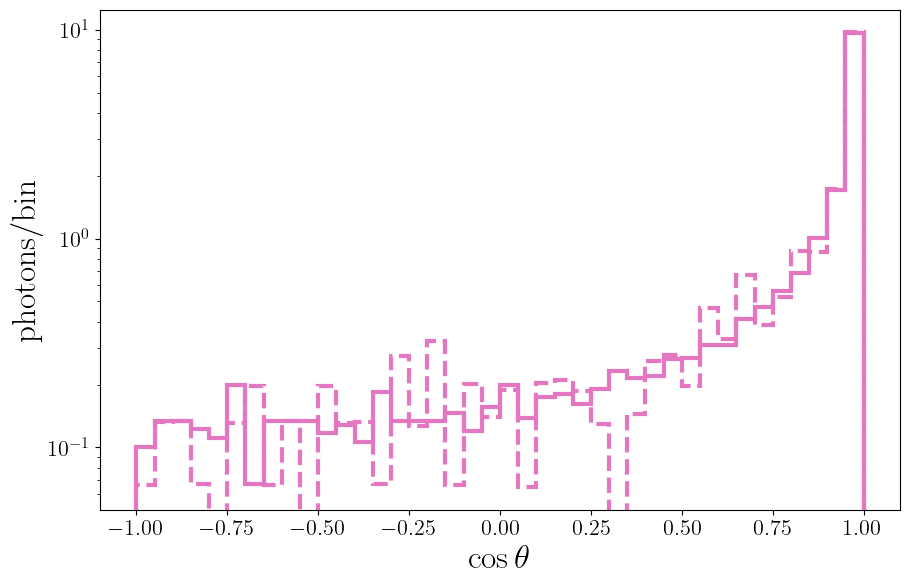

In [14]:
b0 = np.linspace(-1,1, 41)
dens = True

plt.hist(np.transpose(AllEvts)[0], weights=np.transpose(AllEvts)[-1], bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-')
plt.hist(np.transpose(AllEvts2)[0], weights=np.transpose(AllEvts2)[-1], bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='--')

plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$\cos\theta$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
